

---

### **Delta Hedging Simulation Pseudocode for single experiment**

1. **Initialize Parameters**
   - Set initial stock price $ S_0 = 100 $, strike price $ K = 100 $, time to maturity $ T = 1 $ year.
   - Define risk-free rate $ r = 0 $, dividend yield $ q = 0 $.
   - Set implied volatility $ \sigma_{implied} = 0.2 $, actual volatility $ \sigma_{actual} = 0.23 $.
   - Choose number of steps $ n_{steps} = 1000 $, calculate $ dt = T / n_{steps} $.

2. **Define Black-Scholes Functions**
   - **Delta:** $ \Delta(S, K, T) = N(d_1) $, where $ d_1 = \frac{\ln(S/K) + (r - q + 0.5 \sigma^2) T}{\sigma \sqrt{T}} $.
   - **Call Price:** $ C(S, K, T) = S e^{-qT} N(d_1) - K e^{-rT} N(d_2) $, $ d_2 = d_1 - \sigma \sqrt{T} $.

3. **Simulate Stock Price Path**
   - Generate random normals $ Z \sim N(0,1) $ for each step.
   - Iterate to compute $ S_t = S_{t-1} \exp\left( \left(r - q - \frac{\sigma_{actual}^2}{2}\right) dt + \sigma_{actual} \sqrt{dt} Z_t \right) $.
   - return the stock price array

4. **Simulate delta Path**
   - depneding on the current stock price and time to maturity using  **Delta:** $ \Delta(S, K, T) = N(d_1) $, where $ d_1 = \frac{\ln(S/K) + (r - q + 0.5 \sigma^2) T}{\sigma \sqrt{T}} $.
   - return the delta array

5. using - **Call Price:** $ C(S, K, T) = S e^{-qT} N(d_1) - K e^{-rT} N(d_2) $, $ d_2 = d_1 - \sigma \sqrt{T} $ calculate initial and final call price.
   

6. Hedging Approaches:
   - No Transaction Cost vs. With Transaction Cost.
   - Frequent Hedging (e.g., 1,000 times).
   - Reduced Hedging (100 times, 10 times).
   - Trigger-Based Hedging: Re-hedge only if delta changes by more than 5 percentage points.

7. Profit & Loss:
   $$\text{Final P\&L} \;=\; (\text{Option Payoff} - \text{Option Cost}) \;-\; \Delta_{\text{final}} \cdot S_T + \bigl(\Delta_0 \cdot S_0 \;+\; \sum(\Delta \text{ changes} \times S) \bigr)\;-\; \text{Transaction Costs}.$$



Cr - Ci:  1.1899203401562488
Mean: 1.2050
Standard Deviation: 0.5368


(array([ 21.,  83., 106., 136., 129., 127., 117.,  86.,  83.,  56.,  24.,
         20.,   6.,   3.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([0.15353   , 0.34669802, 0.53986604, 0.73303406, 0.92620208,
        1.1193701 , 1.31253813, 1.50570615, 1.69887417, 1.89204219,
        2.08521021, 2.27837823, 2.47154625, 2.66471427, 2.85788229,
        3.05105031, 3.24421833, 3.43738635, 3.63055437, 3.82372239,
        4.01689041]),
 <BarContainer object of 20 artists>)

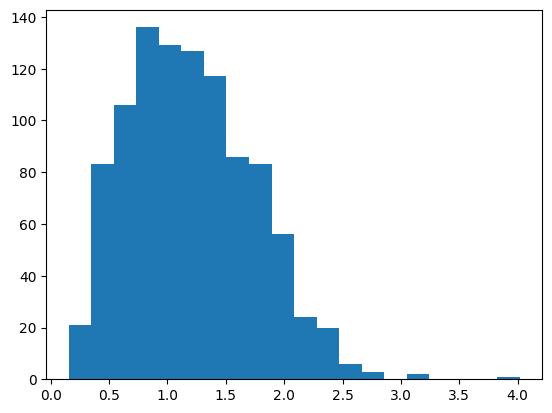

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 2. Define Black-Scholes Functions
def d1(S, K, T, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma):
    return d1(S, K, T, sigma) - sigma * np.sqrt(T)

def delta_bs(S, K, T, sigma):
    return norm.cdf(d1(S, K, T, sigma))

def call_price_bs(S, K, T, sigma):
    return S * np.exp(-q * T) * norm.cdf(d1(S, K, T, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, sigma))


# 1. Initialize Parameters
S0 = 100           # Initial stock price
K = 100            # Strike price
T = 1.0            # Time to maturity in years
r = 0.0            # Risk-free rate
q = 0.0            # Dividend yield
sigma_implied = 0.2
sigma_actual = 0.23
n_steps = 1000
dt = T / n_steps

initial_call_price = call_price_bs(S0, K, T, sigma_implied)
initial_call_price_actuall  = call_price_bs(S0, K, T, sigma_actual)
gap = initial_call_price_actuall -  initial_call_price 

print("Cr - Ci: ", gap)

def delta_hedging_simulation():
    
    #np.random.seed(42)  # For reproducibility

    
    # 3. Simulate Stock Price Path
    Z = np.random.randn(n_steps)
    S = np.zeros(n_steps + 1)
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma_actual ** 2) * dt +
                                 sigma_actual * np.sqrt(dt) * Z[t - 1])

    # 4. Simulate Delta Path
    Delta = np.zeros(n_steps + 1)
    time_remaining = np.linspace(T, 0, n_steps + 1)
    for t in range(n_steps + 1):
        if time_remaining[t] > 0:     # time reamining means time to maturity left
            Delta[t] = delta_bs(S[t], K, time_remaining[t], sigma_implied)
        else:
            # At maturity, Delta is 1 if in the money, else 0
            Delta[t] = 1.0 if S[t] > K else 0.0

    # 5. Calculate Initial and Final Call Price
    
    final_call_price = max(S[-1] - K, 0)

   
    sum=0
    for t in range(1,n_steps+1):
        sum = sum + (Delta[t]-Delta[t-1])*S[t]

    Final_profit = (final_call_price - initial_call_price) - (Delta[-1]*S[-1] - Delta[0]*S[0]) + sum


    
    return(Final_profit)



Profits = []

for _ in range(1000):
    pr = delta_hedging_simulation()
    Profits.append(pr)


# Calculate mean
mean_value = np.mean(Profits)

# Calculate standard deviation
std_value = np.std(Profits)

print(f"Mean: {mean_value:.4f}")
print(f"Standard Deviation: {std_value:.4f}")


plt.hist(Profits, bins=20)



# hedging with tc

Cr - Ci:  0.396851672535135
Mean: -0.6710
Standard Deviation: 0.3086


(array([ 1.,  1.,  1.,  2.,  4.,  4.,  4.,  4.,  5.,  4., 11., 11.,  4.,
        10.,  9.,  6.,  2., 11.,  5.,  1.]),
 array([-1.48568627, -1.41658363, -1.34748099, -1.27837835, -1.20927571,
        -1.14017307, -1.07107043, -1.00196779, -0.93286515, -0.86376251,
        -0.79465987, -0.72555723, -0.65645459, -0.58735195, -0.51824931,
        -0.44914667, -0.38004403, -0.3109414 , -0.24183876, -0.17273612,
        -0.10363348]),
 <BarContainer object of 20 artists>)

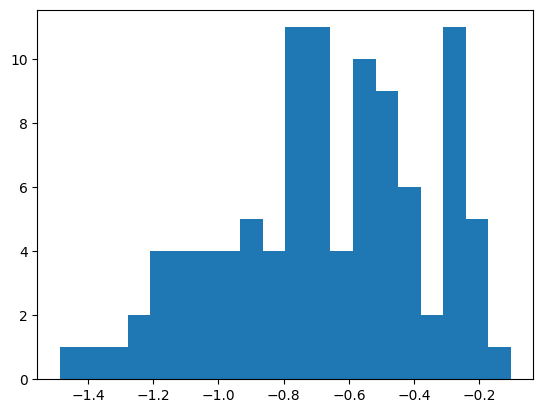

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 2. Define Black-Scholes Functions
def d1(S, K, T, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma):
    return d1(S, K, T, sigma) - sigma * np.sqrt(T)

def delta_bs(S, K, T, sigma):
    return norm.cdf(d1(S, K, T, sigma))

def call_price_bs(S, K, T, sigma):
    return S * np.exp(-q * T) * norm.cdf(d1(S, K, T, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, sigma))


# 1. Initialize Parameters
S0 = 100           # Initial stock price
K = 100            # Strike price
T = 1.0            # Time to maturity in years
r = 0.0            # Risk-free rate
q = 0.0            # Dividend yield
sigma_implied = 0.2
sigma_actual = 0.21
n_steps = 1000
dt = T / n_steps

initial_call_price = call_price_bs(S0, K, T, sigma_implied)
initial_call_price_actuall  = call_price_bs(S0, K, T, sigma_actual)
gap = initial_call_price_actuall -  initial_call_price 

print("Cr - Ci: ", gap)

trn_cost_rate = 0.001
def delta_hedging_simulation():
    
    #np.random.seed(42)  # For reproducibility

    
    # 3. Simulate Stock Price Path
    Z = np.random.randn(n_steps)
    S = np.zeros(n_steps + 1)
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma_actual ** 2) * dt +
                                 sigma_actual * np.sqrt(dt) * Z[t - 1])

    # 4. Simulate Delta Path
    Delta = np.zeros(n_steps + 1)
    time_remaining = np.linspace(T, 0, n_steps + 1)
    for t in range(n_steps + 1):
        if time_remaining[t] > 0:
            Delta[t] = delta_bs(S[t], K, time_remaining[t], sigma_implied)
        else:
            # At maturity, Delta is 1 if in the money, else 0
            Delta[t] = 1.0 if S[t] > K else 0.0

    # 5. Calculate Initial and Final Call Price
    
    final_call_price = max(S[-1] - K, 0)

    trn_cost_sum = 0
    sum=0
    for t in range(1,n_steps+1):
        sum = sum + (Delta[t]-Delta[t-1])*S[t]
        trn_cost_sum = trn_cost_sum + abs((Delta[t]-Delta[t-1])*S[t])*trn_cost_rate

    trn_cost_sum = trn_cost_sum + abs(Delta[0]*S[0]*trn_cost_rate)

    Final_profit = (final_call_price - initial_call_price) - (Delta[-1]*S[-1] - Delta[0]*S[0]) + sum - trn_cost_sum


    
    return(Final_profit)



Profits = []

for _ in range(100):
    pr = delta_hedging_simulation()
    Profits.append(pr)


# Calculate mean
mean_value = np.mean(Profits)

# Calculate standard deviation
std_value = np.std(Profits)

print(f"Mean: {mean_value:.4f}")
print(f"Standard Deviation: {std_value:.4f}")


plt.hist(Profits, bins=20)



Cr - Ci:  1.1899203401562488
Mean: 0.7656
Standard Deviation: 0.8513


(array([ 2.,  0.,  0.,  2.,  3.,  3.,  8., 10., 22., 11., 12.,  8.,  4.,
         5.,  4.,  2.,  1.,  0.,  1.,  2.]),
 array([-1.6009259 , -1.35326165, -1.1055974 , -0.85793315, -0.61026889,
        -0.36260464, -0.11494039,  0.13272387,  0.38038812,  0.62805237,
         0.87571662,  1.12338088,  1.37104513,  1.61870938,  1.86637363,
         2.11403789,  2.36170214,  2.60936639,  2.85703064,  3.1046949 ,
         3.35235915]),
 <BarContainer object of 20 artists>)

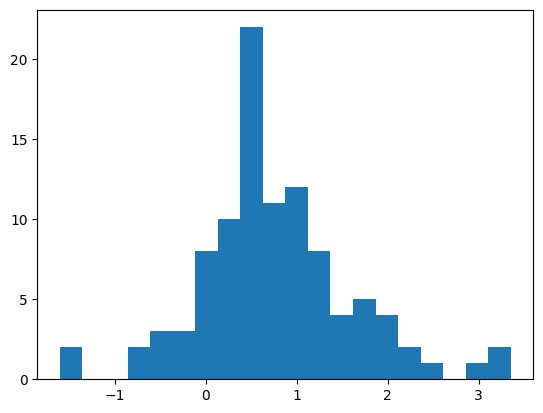

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 2. Define Black-Scholes Functions
def d1(S, K, T, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma):
    return d1(S, K, T, sigma) - sigma * np.sqrt(T)

def delta_bs(S, K, T, sigma):
    return norm.cdf(d1(S, K, T, sigma))

def call_price_bs(S, K, T, sigma):
    return S * np.exp(-q * T) * norm.cdf(d1(S, K, T, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, sigma))


# 1. Initialize Parameters
S0 = 100           # Initial stock price
K = 100            # Strike price
T = 1.0            # Time to maturity in years
r = 0.0            # Risk-free rate
q = 0.0            # Dividend yield
sigma_implied = 0.2
sigma_actual = 0.23
n_steps = 100
dt = T / n_steps

initial_call_price = call_price_bs(S0, K, T, sigma_implied)
initial_call_price_actuall  = call_price_bs(S0, K, T, sigma_actual)
gap = initial_call_price_actuall -  initial_call_price 

print("Cr - Ci: ", gap)

trn_cost_rate = 0.001
def delta_hedging_simulation():
    
    #np.random.seed(42)  # For reproducibility

    
    # 3. Simulate Stock Price Path
    Z = np.random.randn(n_steps)
    S = np.zeros(n_steps + 1)
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma_actual ** 2) * dt +
                                 sigma_actual * np.sqrt(dt) * Z[t - 1])

    # 4. Simulate Delta Path
    Delta = np.zeros(n_steps + 1)
    time_remaining = np.linspace(T, 0, n_steps + 1)
    for t in range(n_steps + 1):
        if time_remaining[t] > 0:
            Delta[t] = delta_bs(S[t], K, time_remaining[t], sigma_implied)
        else:
            # At maturity, Delta is 1 if in the money, else 0
            Delta[t] = 1.0 if S[t] > K else 0.0

    # 5. Calculate Initial and Final Call Price
    
    final_call_price = max(S[-1] - K, 0)

    trn_cost_sum = 0
    sum=0
    for t in range(1,n_steps+1):
        sum = sum + (Delta[t]-Delta[t-1])*S[t]
        trn_cost_sum = trn_cost_sum + abs((Delta[t]-Delta[t-1])*S[t])*trn_cost_rate

    trn_cost_sum = trn_cost_sum + abs(Delta[0]*S[0]*trn_cost_rate)

    Final_profit = (final_call_price - initial_call_price) - (Delta[-1]*S[-1] - Delta[0]*S[0]) + sum - trn_cost_sum


    
    return(Final_profit)



Profits = []

for _ in range(100):
    pr = delta_hedging_simulation()
    Profits.append(pr)


# Calculate mean
mean_value = np.mean(Profits)

# Calculate standard deviation
std_value = np.std(Profits)

print(f"Mean: {mean_value:.4f}")
print(f"Standard Deviation: {std_value:.4f}")


plt.hist(Profits, bins=20)



In [4]:
1000/100


10.0

Cr - Ci:  1.1899203401562488
Mean: 0.9266
Standard Deviation: 2.0561


(array([ 6.,  5.,  6., 14., 17., 11.,  9.,  8.,  6.,  8.,  4.,  3.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-2.45453194, -1.87103625, -1.28754055, -0.70404486, -0.12054916,
         0.46294654,  1.04644223,  1.62993793,  2.21343363,  2.79692932,
         3.38042502,  3.96392072,  4.54741641,  5.13091211,  5.71440781,
         6.2979035 ,  6.8813992 ,  7.4648949 ,  8.04839059,  8.63188629,
         9.21538199]),
 <BarContainer object of 20 artists>)

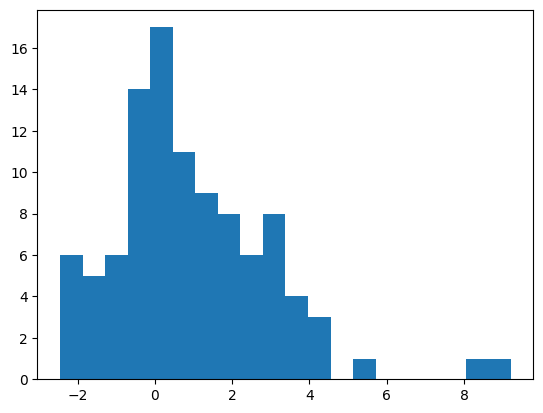

: 

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 2. Define Black-Scholes Functions
def d1(S, K, T, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma):
    return d1(S, K, T, sigma) - sigma * np.sqrt(T)

def delta_bs(S, K, T, sigma):
    return norm.cdf(d1(S, K, T, sigma))

def call_price_bs(S, K, T, sigma):
    return S * np.exp(-q * T) * norm.cdf(d1(S, K, T, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, sigma))


# 1. Initialize Parameters
S0 = 100           # Initial stock price
K = 100            # Strike price
T = 1.0            # Time to maturity in years
r = 0.0            # Risk-free rate
q = 0.0            # Dividend yield
sigma_implied = 0.2
sigma_actual = 0.23
n_steps = 1000
n_rehedge = 100
dt = T / n_steps

initial_call_price = call_price_bs(S0, K, T, sigma_implied)
initial_call_price_actuall  = call_price_bs(S0, K, T, sigma_actual)
gap = initial_call_price_actuall -  initial_call_price 

print("Cr - Ci: ", gap)

trn_cost_rate = 0.001
def delta_hedging_simulation():
    
    #np.random.seed(42)  # For reproducibility

    
    # 3. Simulate Stock Price Path
    Z = np.random.randn(n_steps)
    S = np.zeros(n_steps + 1)
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma_actual ** 2) * dt +
                                 sigma_actual * np.sqrt(dt) * Z[t - 1])

    # 4. Simulate Delta Path
    Delta = np.zeros(n_steps + 1)
    time_remaining = np.linspace(T, 0, n_steps + 1)
    for t in range(n_steps + 1):
        if time_remaining[t] > 0:
            Delta[t] = delta_bs(S[t], K, time_remaining[t], sigma_implied)
        else:
            # At maturity, Delta is 1 if in the money, else 0
            Delta[t] = 1.0 if S[t] > K else 0.0

    # 5. Calculate Initial and Final Call Price
    
    final_call_price = max(S[-1] - K, 0)

    trn_cost_sum = 0
    sum=0

    period = int(n_steps/n_rehedge)

    for t in range(1,n_steps+1, period):
        sum = sum + (Delta[t]-Delta[t-period])*S[t]
        trn_cost_sum = trn_cost_sum + abs((Delta[t]-Delta[t-period])*S[t])*trn_cost_rate

    trn_cost_sum = trn_cost_sum + abs(Delta[0]*S[0]*trn_cost_rate)

    Final_profit = (final_call_price - initial_call_price) - (Delta[-1]*S[-1] - Delta[0]*S[0]) + sum - trn_cost_sum


    
    return(Final_profit)



Profits = []

for _ in range(10000):
    pr = delta_hedging_simulation()
    Profits.append(pr)


# Calculate mean
mean_value = np.mean(Profits)

# Calculate standard deviation
std_value = np.std(Profits)

print(f"Mean: {mean_value:.4f}")
print(f"Standard Deviation: {std_value:.4f}")


plt.hist(Profits, bins=20)



In [19]:
report = []

Mean: 1.1909
Standard Deviation: 0.5482


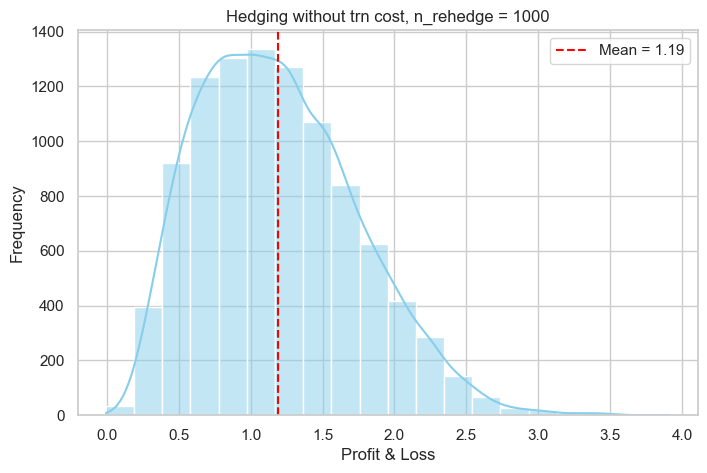

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read the CSV output from C++
df = pd.read_csv("PnL_hedgewithouttc_1000.csv")

# Basic statistics
mean_pl = df["Final_Profit"].mean()
std_pl = df["Final_Profit"].std()
print(f"Mean: {mean_pl:.4f}")
print(f"Standard Deviation: {std_pl:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Profit"], bins=20, kde=True, color="skyblue")
plt.axvline(mean_pl, color='red', linestyle='--', label=f'Mean = {mean_pl:.2f}')
plt.title("Hedging without trn cost, n_rehedge = 1000")
plt.xlabel("Profit & Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

report.append(("Hedging without trn cost, n_rehedge = 1000", mean_pl, std_pl))

Mean: 0.0654
Standard Deviation: 0.2499


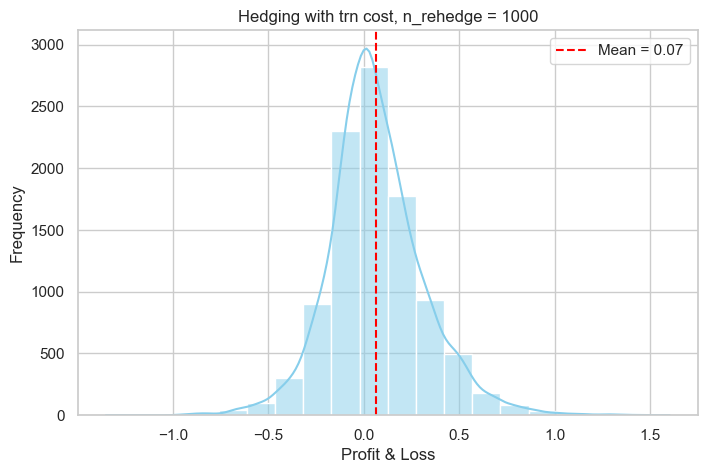

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read the CSV output from C++
df = pd.read_csv("PnL_hedgewithtc_1000.csv")

# Basic statistics
mean_pl = df["Final_Profit"].mean()
std_pl = df["Final_Profit"].std()
print(f"Mean: {mean_pl:.4f}")
print(f"Standard Deviation: {std_pl:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Profit"], bins=20, kde=True, color="skyblue")
plt.axvline(mean_pl, color='red', linestyle='--', label=f'Mean = {mean_pl:.2f}')
plt.title("Hedging with trn cost, n_rehedge = 1000")
plt.xlabel("Profit & Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

report.append(("Hedging with trn cost, n_rehedge = 1000", mean_pl, std_pl))

Mean: 0.7961
Standard Deviation: 0.8643


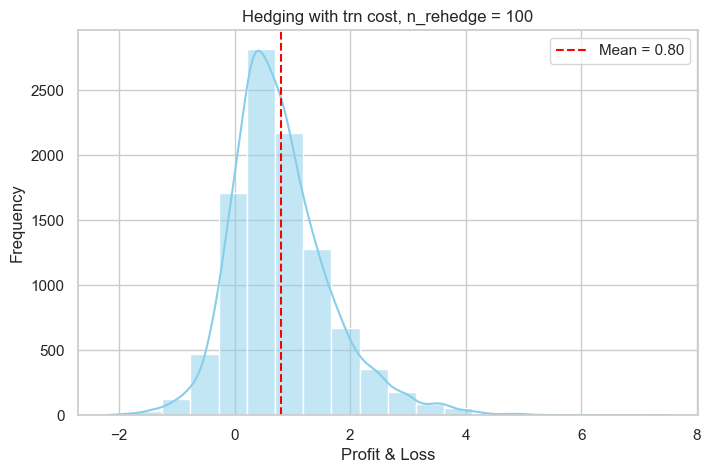

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read the CSV output from C++
df = pd.read_csv("PnL_hedgewithtc_100.csv")

# Basic statistics
mean_pl = df["Final_Profit"].mean()
std_pl = df["Final_Profit"].std()
print(f"Mean: {mean_pl:.4f}")
print(f"Standard Deviation: {std_pl:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Profit"], bins=20, kde=True, color="skyblue")
plt.axvline(mean_pl, color='red', linestyle='--', label=f'Mean = {mean_pl:.2f}')
plt.title("Hedging with trn cost, n_rehedge = 100")
plt.xlabel("Profit & Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

report.append(("Hedging with trn cost, n_rehedge = 100", mean_pl, std_pl))

Mean: 1.0386
Standard Deviation: 2.4464


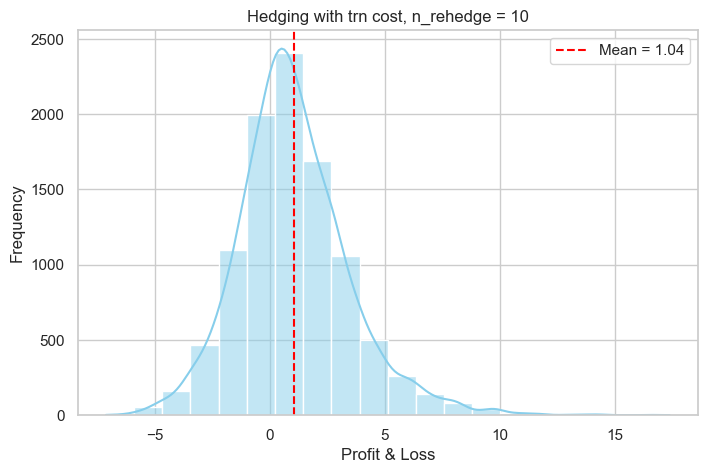

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read the CSV output from C++
df = pd.read_csv("PnL_hedgewithtc_10.csv")

# Basic statistics
mean_pl = df["Final_Profit"].mean()
std_pl = df["Final_Profit"].std()
print(f"Mean: {mean_pl:.4f}")
print(f"Standard Deviation: {std_pl:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Profit"], bins=20, kde=True, color="skyblue")
plt.axvline(mean_pl, color='red', linestyle='--', label=f'Mean = {mean_pl:.2f}')
plt.title("Hedging with trn cost, n_rehedge = 10")
plt.xlabel("Profit & Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

report.append(("Hedging without trn cost, n_rehedge = 10", mean_pl, std_pl))


# trigger based

Cr - Ci:  1.1899203401562488
69
86
125
129
136
141
151
184
197
237
244
262
285
301
321
328
331
343
351
366
378
383
399
415
421
463
493
564
574
656
657
662
676
680
698
720
749
774
780
787
792
801
807
809
816
828
840
847
858
860
863
867
871
873
876
877
884
885
888
893
894
903
907
910
911
920
925
926
927
929
932
937
939
941
942
944
955
959
960
966
968
982
9
46
54
64
87
93
108
140
145
158
206
212
236
252
262
291
294
311
314
324
348
366
368
388
393
418
423
429
438
444
453
459
462
466
468
473
478
492
510
515
545
557
565
578
583
589
600
620
673
675
690
695
702
705
710
723
726
741
750
755
758
762
765
772
774
777
785
789
795
814
824
833
835
837
841
846
848
850
851
854
861
864
866
870
872
874
877
881
887
891
893
896
897
907
912
913
917
919
922
924
925
928
933
934
946
948
955
957
958
960
964
965
966
970
973
975
977
978
979
980
982
984
985
986
988
989
990
991
994
995
996
997
998
999
1000
5
13
49
73
98
111
114
118
127
135
160
219
225
269
375
446
18
59
63
73
90
105
112
149
152
154
169
211
234
246
26

(array([ 1.,  2.,  3.,  6.,  1.,  7.,  9.,  9.,  9., 14., 14.,  4.,  4.,
         7.,  5.,  0.,  1.,  0.,  2.,  2.]),
 array([-0.73949311, -0.56914832, -0.39880353, -0.22845874, -0.05811395,
         0.11223084,  0.28257563,  0.45292042,  0.62326521,  0.79361   ,
         0.96395478,  1.13429957,  1.30464436,  1.47498915,  1.64533394,
         1.81567873,  1.98602352,  2.15636831,  2.3267131 ,  2.49705789,
         2.66740267]),
 <BarContainer object of 20 artists>)

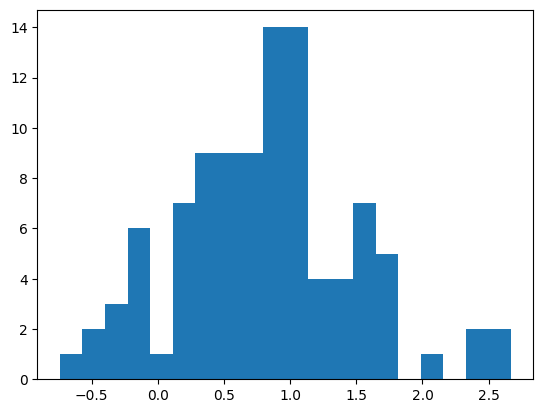

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 2. Define Black-Scholes Functions
def d1(S, K, T, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma):
    return d1(S, K, T, sigma) - sigma * np.sqrt(T)

def delta_bs(S, K, T, sigma):
    return norm.cdf(d1(S, K, T, sigma))

def call_price_bs(S, K, T, sigma):
    return S * np.exp(-q * T) * norm.cdf(d1(S, K, T, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, sigma))


# 1. Initialize Parameters
S0 = 100           # Initial stock price
K = 100            # Strike price
T = 1.0            # Time to maturity in years
r = 0.0            # Risk-free rate
q = 0.0            # Dividend yield
sigma_implied = 0.2
sigma_actual = 0.23
n_steps = 1000
dt = T / n_steps

initial_call_price = call_price_bs(S0, K, T, sigma_implied)


trn_cost_rate = 0.001
def delta_hedging_simulation():
    
    #np.random.seed(42)  # For reproducibility

    
    # 3. Simulate Stock Price Path
    Z = np.random.randn(n_steps)
    S = np.zeros(n_steps + 1)
    S[0] = S0
    for t in range(1, n_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma_actual ** 2) * dt +
                                 sigma_actual * np.sqrt(dt) * Z[t - 1])

    # 4. Simulate Delta Path
    Delta = np.zeros(n_steps + 1)
    time_remaining = np.linspace(T, 0, n_steps + 1)
    for t in range(n_steps + 1):
        if time_remaining[t] > 0:
            Delta[t] = delta_bs(S[t], K, time_remaining[t], sigma_implied)
        else:
            # At maturity, Delta is 1 if in the money, else 0
            Delta[t] = 1.0 if S[t] > K else 0.0

    # 5. Calculate Initial and Final Call Price
    
    final_call_price = max(S[-1] - K, 0)

    trn_cost_sum = 0
    sum=0
    current_delta = Delta[0]
    for t in range(1,n_steps+1):
        if abs(current_delta - Delta[t]) > 0.05:
            sum = sum + (Delta[t]-current_delta)*S[t]
            trn_cost_sum = trn_cost_sum + abs((Delta[t]-current_delta)*S[t])*trn_cost_rate
            current_delta = Delta[t]
            print(t)

    trn_cost_sum = trn_cost_sum + abs(Delta[0]*S[0]*trn_cost_rate)

    Final_profit = (final_call_price - initial_call_price) - (current_delta*S[-1] - Delta[0]*S[0]) + sum - trn_cost_sum


    
    return(Final_profit)



Profits = []

for _ in range(100):
    pr = delta_hedging_simulation()
    Profits.append(pr)


# Calculate mean
mean_value = np.mean(Profits)

# Calculate standard deviation
std_value = np.std(Profits)

print(f"Mean: {mean_value:.4f}")
print(f"Standard Deviation: {std_value:.4f}")


plt.hist(Profits, bins=20)



Mean: 0.7220
Standard Deviation: 0.5863


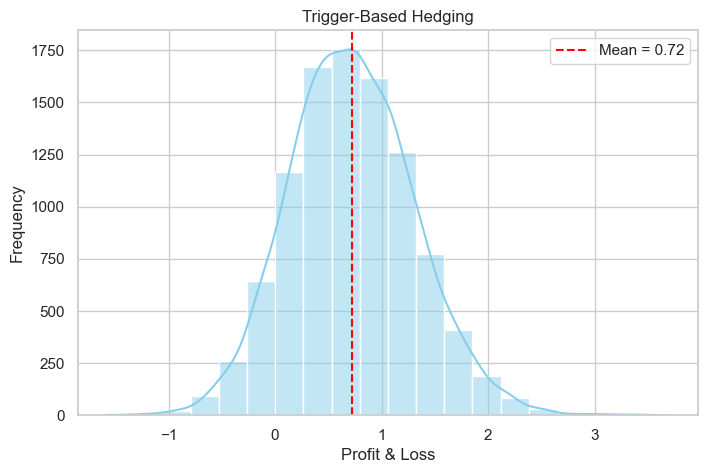

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read the CSV output from C++
df = pd.read_csv("PnL_Trigger_Hedging.csv")

# Basic statistics
mean_pl = df["Final_Profit"].mean()
std_pl = df["Final_Profit"].std()
print(f"Mean: {mean_pl:.4f}")
print(f"Standard Deviation: {std_pl:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Profit"], bins=20, kde=True, color="skyblue")
plt.axvline(mean_pl, color='red', linestyle='--', label=f'Mean = {mean_pl:.2f}')
plt.title("Trigger-Based Hedging")
plt.xlabel("Profit & Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()

report.append(("Trigger-Based Hedging", mean_pl, std_pl))


In [ ]:
report

In [25]:
report

[('Hedging without trn cost, n_rehedge = 1000',
  1.190921715135,
  0.5481573098451659),
 ('Hedging with trn cost, n_rehedge = 1000',
  0.06536361903399099,
  0.24993097726434205),
 ('Hedging with trn cost, n_rehedge = 100',
  0.7961092907980899,
  0.8642761053397708),
 ('Hedging without trn cost, n_rehedge = 10',
  1.0385778869155002,
  2.446398499067958),
 ('Trigger-Based Hedging', 0.7219609872889999, 0.586291219030405)]

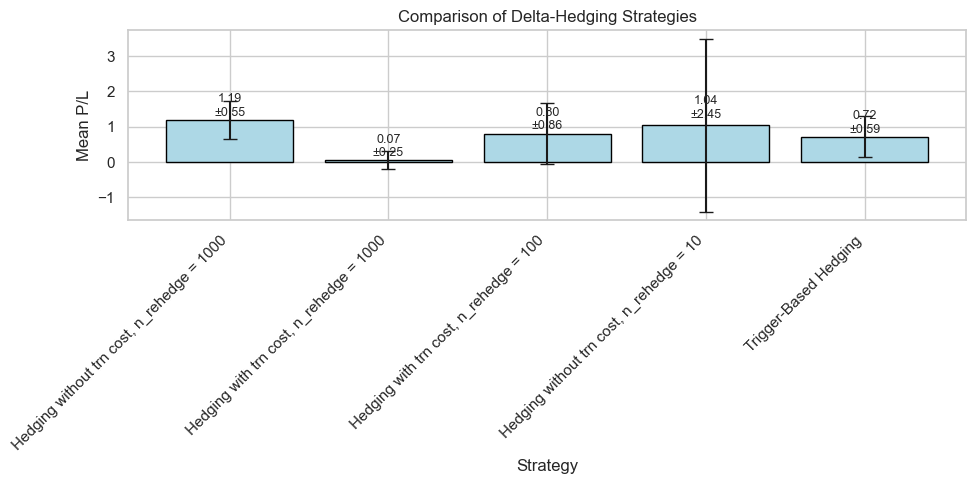

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_delta_hedging_report(report_array):
    """
    Takes a list of tuples: (Strategy, Mean P/L, Std Dev), 
    then plots a bar chart with error bars for easy comparison.
    """
    # Convert to DataFrame
    # Each tuple is (Strategy string, mean float, std float)
    df = pd.DataFrame(report_array, columns=['Strategy', 'Mean P/L', 'Std Dev'])

    # Prepare the data for plotting
    x_positions = np.arange(len(df))      # e.g., [0,1,2,3,4] for 5 strategies
    means = df['Mean P/L'].values
    stds  = df['Std Dev'].values
    labels = df['Strategy'].values

    # Create the bar chart
    plt.figure(figsize=(10,5))
    plt.bar(
        x_positions, 
        means, 
        yerr=stds, 
        capsize=5, 
        color='lightblue', 
        edgecolor='black'
    )

    plt.title("Comparison of Delta-Hedging Strategies")
    plt.xlabel("Strategy")
    plt.ylabel("Mean P/L")

    # Set x-ticks and labels
    plt.xticks(x_positions, labels, rotation=45, ha='right')

    # Annotate each bar with numeric values (Mean ± Std)
    for i, (m, s) in enumerate(zip(means, stds)):
        plt.text(
            i, 
            m + (s * 0.05),
            f"{m:.2f}\n±{s:.2f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


plot_delta_hedging_report(report)


In [29]:
report

[('Hedging without trn cost, n_rehedge = 1000',
  1.190921715135,
  0.5481573098451659),
 ('Hedging with trn cost, n_rehedge = 1000',
  0.06536361903399099,
  0.24993097726434205),
 ('Hedging with trn cost, n_rehedge = 100',
  0.7961092907980899,
  0.8642761053397708),
 ('Hedging without trn cost, n_rehedge = 10',
  1.0385778869155002,
  2.446398499067958),
 ('Trigger-Based Hedging', 0.7219609872889999, 0.586291219030405)]